In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pylab as plt
import datetime as dt
import time
import pandas as pd

from keras.models import Sequential#, Graph
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D

%matplotlib inline  

In [11]:
df = pd.read_csv('../../../dbs/db_BTC_30min_240days.csv', index_col=0)
df.head()

_id     close        date exchange      high  \
0  5aedfe8bd89fc41a17d78220  0.073140  1525114800     polo  0.073140   
1  5aedfe8bd89fc41a17d78222  0.072995  1525115100     polo  0.073005   
2  5aedfe8bd89fc41a17d78224  0.073000  1525115400     polo  0.073117   
3  5aedfe8bd89fc41a17d78226  0.072905  1525115700     polo  0.073099   
4  5aedfe8bd89fc41a17d78228  0.073145  1525116000     polo  0.073158   

                        id       low      open     pair  quoteVolume  \
0  polo-BTC_ETH-1525114800  0.072998  0.073100  BTC_ETH    32.892072   
1  polo-BTC_ETH-1525115100  0.072860  0.072998  BTC_ETH    19.287254   
2  polo-BTC_ETH-1525115400  0.072860  0.072875  BTC_ETH     5.367373   
3  polo-BTC_ETH-1525115700  0.072900  0.073000  BTC_ETH     2.112981   
4  polo-BTC_ETH-1525116000  0.072900  0.072905  BTC_ETH     6.995366   

     volume  weightedAverage  
0  2.401576         0.073014  
1  1.406868         0.072943  
2  0.391472         0.072935  
3  0.154241         0.072997  
4  0.511110         0.073064

In [16]:
def get_pair(pair= 'BTC_ETH'):
    db = df.loc[df.pair==pair, ['date','open','high','low','close','quoteVolume','volume','weightedAverage']]
    db.date = pd.to_datetime(df["date"], unit='s')
    return db

df_BTC_ETH = get_pair()

/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


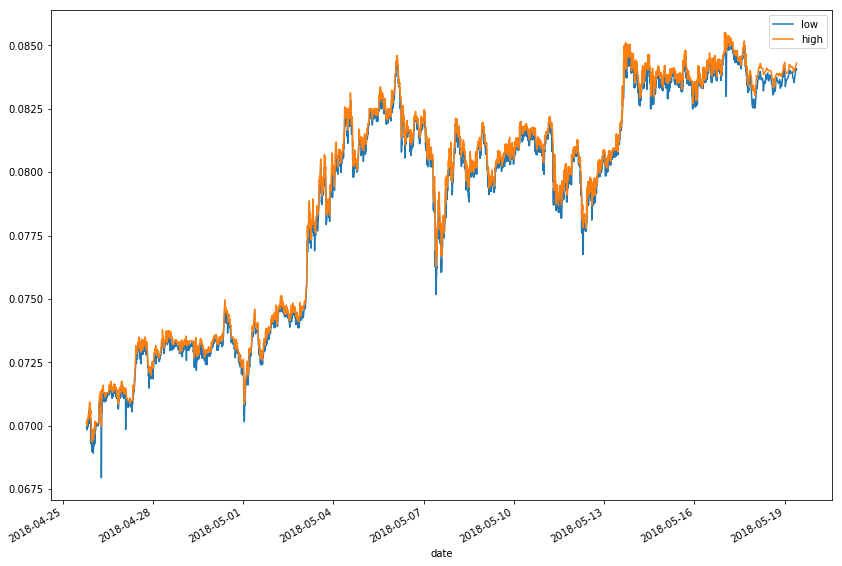

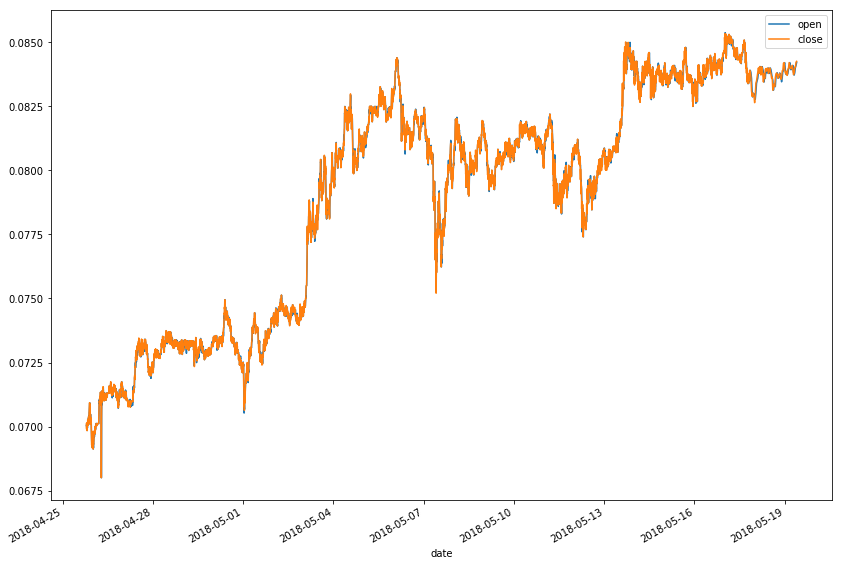

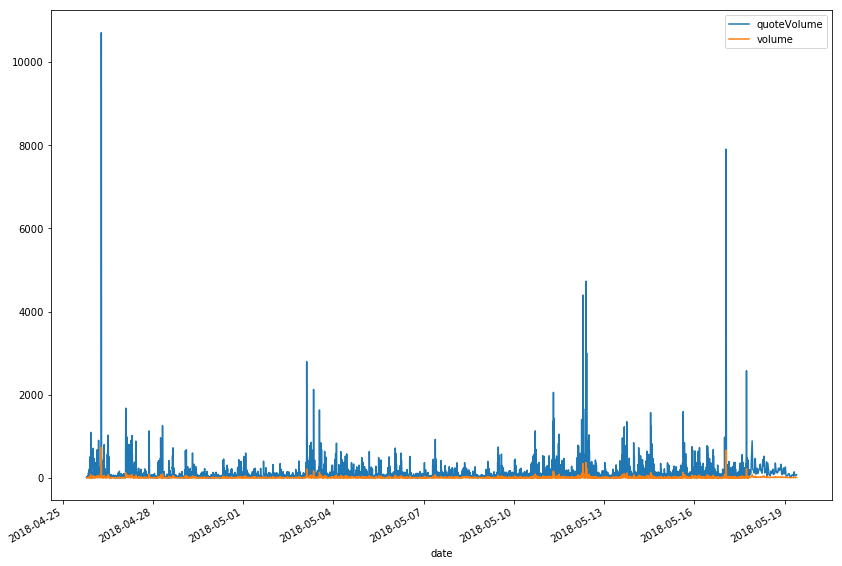

In [27]:
df_BTC_ETH.plot(x = ['date'], y = ['low','high'], figsize=(14,10))
df_BTC_ETH.plot(x = ['date'], y = ['open','close'], figsize=(14,10))
df_BTC_ETH.plot(x = ['date'], y = ['quoteVolume','volume'], figsize=(14,10))